<a href="https://colab.research.google.com/github/dhyannn/reinforcment-learing/blob/main/514_RLlab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temporal-Difference (TD) learning is a method used in Reinforcement Learning to help an agent figure out how good it is to be in a certain state, based on its experiences.

In [ ]:
import numpy as np


In [ ]:

class SimpleEnv:
    def __init__(self, size=5):
        self.size = size
        self.states = np.arange(1, size + 1)
        self.current_state = 1  # Start at state 1
        self.terminal_state = size

    def step(self, action):
        """
        Take an action (always move forward by 1 in this environment).
        Returns: next_state, reward, done
        """
        if self.current_state == self.terminal_state:
            return self.current_state, 0, True  # Terminal state, no reward

        self.current_state += 1
        reward = 1 if self.current_state == self.terminal_state else 0
        done = self.current_state == self.terminal_state
        return self.current_state, reward, done

    def reset(self):
        self.current_state = 1
        return self.current_state

In [ ]:
def td_0(env, alpha=0.1, gamma=0.9, episodes=100):
    state_values = np.zeros(env.size + 1)  # Initialize values for all states (0-indexed, state 0 unused)

    for episode in range(episodes):
        state = env.reset()
        done = False

        while not done:
            next_state, reward, done = env.step(action=None)  # Action is fixed in this simple environment

            td_target = reward + gamma * state_values[next_state]
            td_error = td_target - state_values[state]
            state_values[state] += alpha * td_error

            state = next_state

    return state_values[1:]  # Return values excluding the dummy state 0

### Key Ideas:

1. **Learning by Doing**:
   - The agent moves through an environment and collects rewards based on its actions.
   - As it moves, it updates its beliefs (value estimates) about how good it is to be in each state.

2. **Estimation on the Go**:
   - Unlike methods that wait until the end of an episode to update values (e.g., Monte Carlo), TD updates the value estimates after every step.
   - It combines:
     - The reward received immediately.
     - An estimate of the value of the next state.

3. **Bootstrapping**:
   - TD uses its own current guesses (value estimates) to improve its understanding.



In [ ]:
# Simulate the environment
env = SimpleEnv(size=5)
state_values = td_0(env, alpha=0.1, gamma=0.9, episodes=500)

# Display learned state values
print("Learned State-Value Function:", state_values)

Learned State-Value Function: [0.729 0.81  0.9   1.    0.   ]


The learned state-value function **[0.729, 0.81, 0.9, 1.0, 0.0]** represents how valuable it is for an agent to be in each state based on its experience and the rewards it expects to receive in the future.

1. **State 1 (0.729)**: The agent values being in this state moderately because it has learned that, starting here, it can earn a decent reward if it follows the best actions.

2. **State 2 (0.81)**: This state is slightly better than State 1 because the agent expects a higher cumulative reward starting from here.

3. **State 3 (0.9)**: The agent believes being here is even better, as it brings it closer to achieving higher rewards.

4. **State 4 (1.0)**: This is the **best state** for the agent (likely a goal or terminal state), where the rewards are maximized.

5. **State 5 (0.0)**: The agent assigns no value to this state, possibly because it’s a terminal state with no rewards beyond this point.


#Visualization

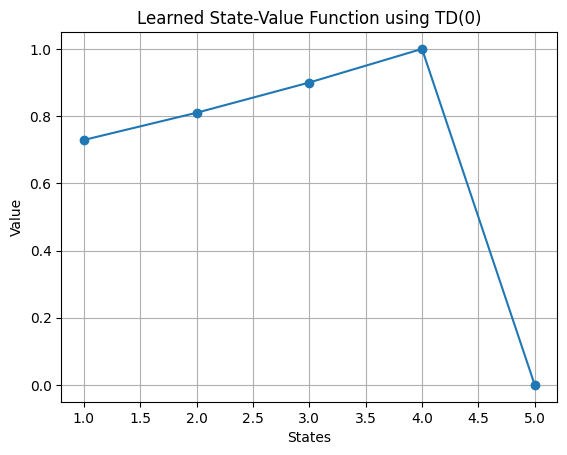

In [ ]:
import matplotlib.pyplot as plt

plt.plot(env.states, state_values, marker='o')
plt.xlabel("States")
plt.ylabel("Value")
plt.title("Learned State-Value Function using TD(0)")
plt.grid()
plt.show()